In [503]:
%matplotlib inline

import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from scipy.stats import pearsonr
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

sns.set_context('poster')
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style('whitegrid')

In [504]:
# Read CSV
rawdata = pd.read_csv('../data/housing.csv')

In [505]:
rawdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [506]:
rawdata.shape

(1460, 81)

In [507]:
#check for null values in raw data
rawdata.isnull().sum().sort_values(ascending = False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [508]:
#drop columns with null values of more than 100
rawdata.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],axis = 1, inplace = True)

In [509]:
rawdata.shape

(1460, 75)

C:\Users\bubuj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


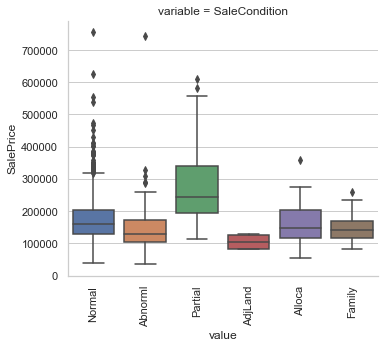

In [510]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

p = pd.melt(rawdata, id_vars='SalePrice', value_vars='SaleCondition')
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

In [511]:
housing = rawdata[rawdata['SaleCondition'] == 'Normal']

In [512]:
housing.shape

(1198, 75)

In [513]:
#Check for null values
housing.isnull().sum().sort_values(ascending = False)[:15]

GarageType      61
GarageYrBlt     61
GarageFinish    61
GarageCond      61
GarageQual      61
BsmtExposure    33
BsmtFinType2    33
BsmtFinType1    32
BsmtCond        32
BsmtQual        32
MasVnrType       4
MasVnrArea       4
Electrical       1
RoofMatl         0
RoofStyle        0
dtype: int64

In [514]:
#check why 61 garage-related variables are null
housing[pd.isna(housing['GarageType'])].filter(items = ['GarageCars', 'GarageArea', 'GarageType','GarageYrBlt','GarageFinish','GarageCond','GarageQual']).T

,78,89,99,108,125,127,140,148,155,163,...,1218,1257,1283,1323,1325,1326,1337,1349,1407,1450
GarageCars,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GarageArea,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GarageType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageYrBlt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageFinish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageCond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageQual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [515]:
#check basement-related variables are null
housing[pd.isna(housing['BsmtExposure'])].filter(items = ['TotalBsmtSF', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','BsmtCond','BsmtQual']).T    

,17,90,156,182,259,342,362,371,392,520,...,1035,1045,1048,1090,1179,1216,1218,1232,1321,1412
TotalBsmtSF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BsmtExposure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinType1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinType2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtCond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtQual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [516]:
#fill the NaN as N/A as these represent not applicable categories
housing.fillna('N/A')

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000
10,11,20,RL,11200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,129500
12,13,20,RL,12968,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,0,176,0,0,9,2008,WD,Normal,144000


In [517]:
housing.shape

(1198, 75)

In [518]:
housing['SalePrice'].describe()

count      1198.000000
mean     175202.219533
std       69713.636280
min       39300.000000
25%      130000.000000
50%      160000.000000
75%      205000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [519]:
IQR = 205000 + 1.5 * (205000-130000)
print(IQR)

317500.0


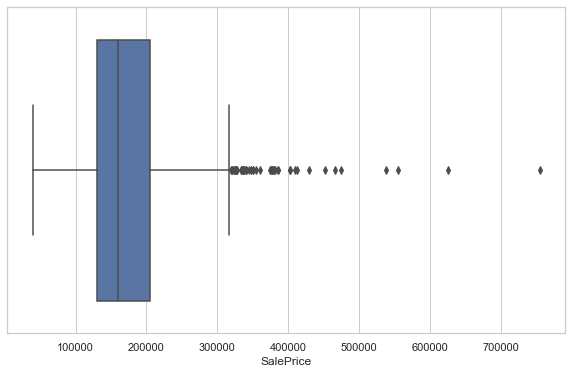

In [520]:
sns.boxplot(x=housing['SalePrice'])

The skewness of SalePrice is 1.8208232439285361


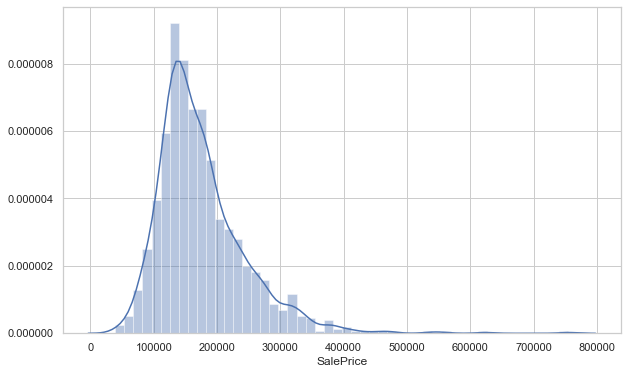

In [521]:
#visualising sale price
sns.distplot(housing['SalePrice'])
print ("The skewness of SalePrice is {}".format(housing['SalePrice'].skew()))

Skewness is 0.2763576827149849


C:\Users\bubuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


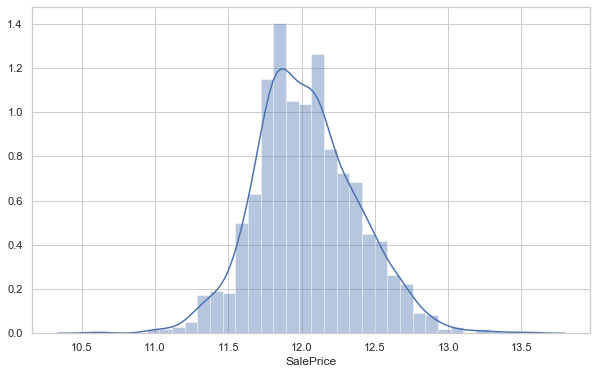

In [522]:
#log transforming the variable to fix the skewness
housing['logSalePrice'] = np.log(housing['SalePrice'])
print ('Skewness is', loghousing.skew())
sns.distplot(loghousing)

In [523]:
#separate variables into new data frames
numeric_data = housing.select_dtypes(include=[np.number])
cat_data = housing.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in the housing data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 38 numeric and 38 categorical columns in the housing data


In [524]:
numeric_data.head(5)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,logSalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,61,0,0,0,0,0,2,2008,208500,12.247694
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,0,5,2007,181500,12.109011
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,42,0,0,0,0,0,9,2008,223500,12.317167
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,84,0,0,0,0,0,12,2008,250000,12.429216
5,6,50,14115,5,5,1993,1995,0.0,732,0,...,30,0,320,0,0,700,10,2009,143000,11.870600


In [525]:
del numeric_data['Id']

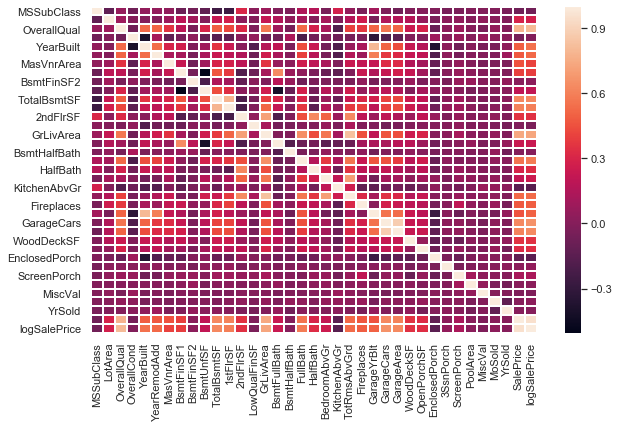

In [526]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr, linewidths = 1)

In [527]:
print(numeric_data.dtypes)

MSSubClass         int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
logSalePrice     float64
dtype: object


In [528]:
#print the strongest positive and negative correlated variables with Sale Price
print(housing.corr()['SalePrice'].sort_values(ascending = False)[:15])
print ('----------------------')
print(housing.corr()['SalePrice'].sort_values(ascending = True)[:10])

SalePrice       1.000000
logSalePrice    0.954610
OverallQual     0.786850
GrLivArea       0.744517
TotalBsmtSF     0.628819
GarageCars      0.626678
1stFlrSF        0.610918
GarageArea      0.608056
FullBath        0.562128
TotRmsAbvGrd    0.527860
YearBuilt       0.494597
YearRemodAdd    0.476759
Fireplaces      0.476356
MasVnrArea      0.459111
GarageYrBlt     0.453997
Name: SalePrice, dtype: float64
----------------------
KitchenAbvGr    -0.145114
EnclosedPorch   -0.120773
MSSubClass      -0.072141
OverallCond     -0.047430
Id              -0.021685
MiscVal         -0.016608
LowQualFinSF    -0.014440
BsmtHalfBath    -0.000349
YrSold           0.006884
MoSold           0.010381
Name: SalePrice, dtype: float64


C:\Users\bubuj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


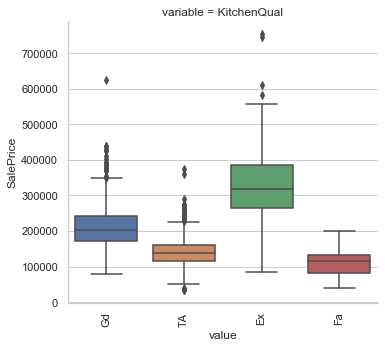

In [529]:
p = pd.melt(rawdata, id_vars='SalePrice', value_vars='KitchenQual')
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

C:\Users\bubuj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


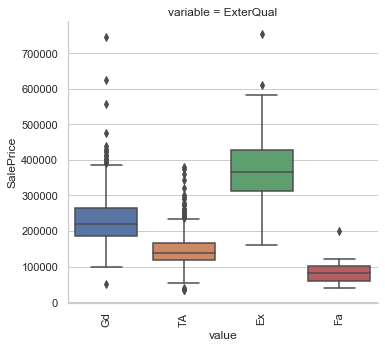

In [530]:
p = pd.melt(rawdata, id_vars='SalePrice', value_vars='ExterQual')
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

Pearsons correlation: 0.831


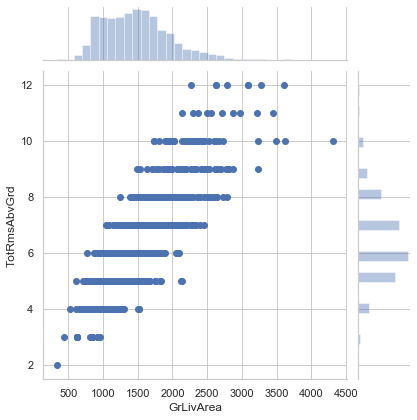

In [531]:
#assess correlation between GrLivArea and TotRmsAbvGrd    
sns.jointplot(x=housing['GrLivArea'], y=housing['TotRmsAbvGrd'])
corr, _ = pearsonr(housing['GrLivArea'], housing['TotRmsAbvGrd'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.384


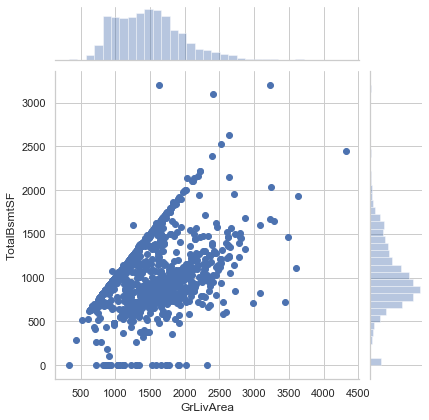

In [532]:
#assess correlation between GrLivArea and TotalBsmtSF
sns.jointplot(x=housing['GrLivArea'], y=housing['TotalBsmtSF'])
corr, _ = pearsonr(housing['GrLivArea'], housing['TotalBsmtSF'])
print('Pearsons correlation: %.3f' % corr)

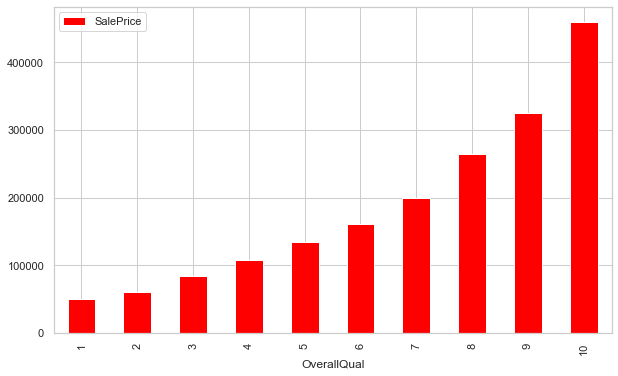

In [533]:
#Strongest correlated variable is OverallQual. let's check the mean price per quality.
pivot = housing.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
pivot.plot(kind='bar', color='red')

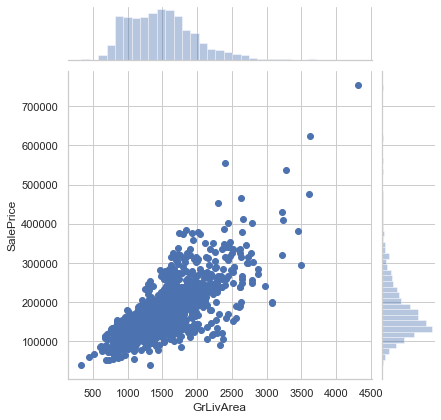

In [534]:
#Second strongest correlated variable is GrLivArea. Let's plot its relationship to the Sale Price
sns.jointplot(x=housing['GrLivArea'], y=housing['SalePrice'])

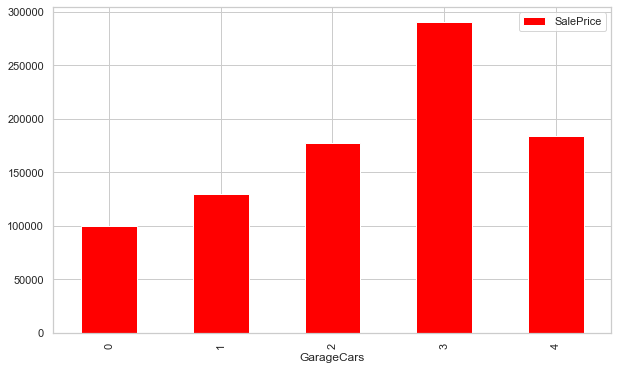

In [535]:
#For GarageCars variable, let's check the mean price as the number of carspots increase.
pivot = housing.pivot_table(index='GarageCars', values='SalePrice', aggfunc=np.median)
pivot.plot(kind='bar', color='red')

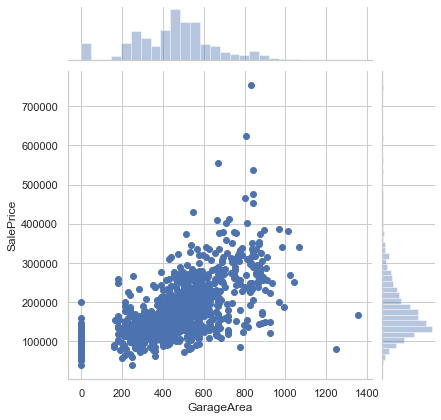

In [536]:
#How about by Garage Area?
sns.jointplot(x=housing['GarageArea'], y=housing['SalePrice'])

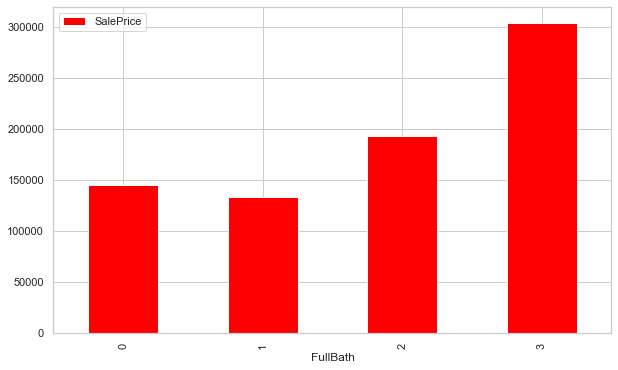

In [537]:
#assess the FullBath variable
housing['FullBath'].unique()
pivot = housing.pivot_table(index='FullBath', values='SalePrice', aggfunc=np.median)
pivot.plot(kind='bar', color='red')

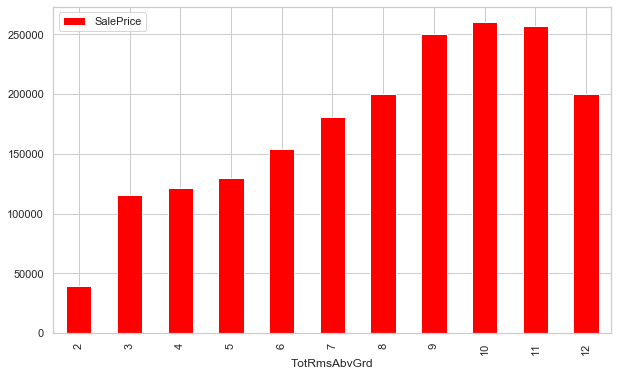

In [538]:
#assess the nubmer of rooms above grade
housing['TotRmsAbvGrd'].unique()
pivot = housing.pivot_table(index='TotRmsAbvGrd', values='SalePrice', aggfunc=np.median)
pivot.plot(kind='bar', color='red')

C:\Users\bubuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\bubuj\Anaconda3\lib\site-packages\scipy\stats\stats.py:2959: RuntimeWarning: invalid value encountered in double_scalars
  msb = ssbn / dfbn
C:\Users\bubuj\Anaconda3\lib\site-packages\scipy\stats\stats.py:2951: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


<module 'matplotlib.pyplot' from 'C:\\Users\\bubuj\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

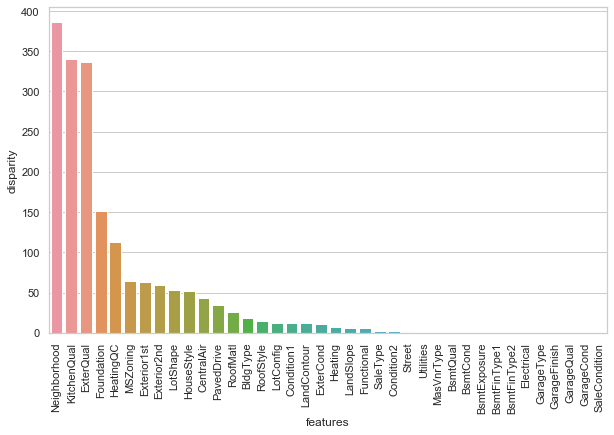

In [539]:
#Use ANOVA to see how categorical variables influence the Hous Price
cat = [f for f in housing.columns if housing.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['SalePrice'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['SalePrice'] = housing.SalePrice.values
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt

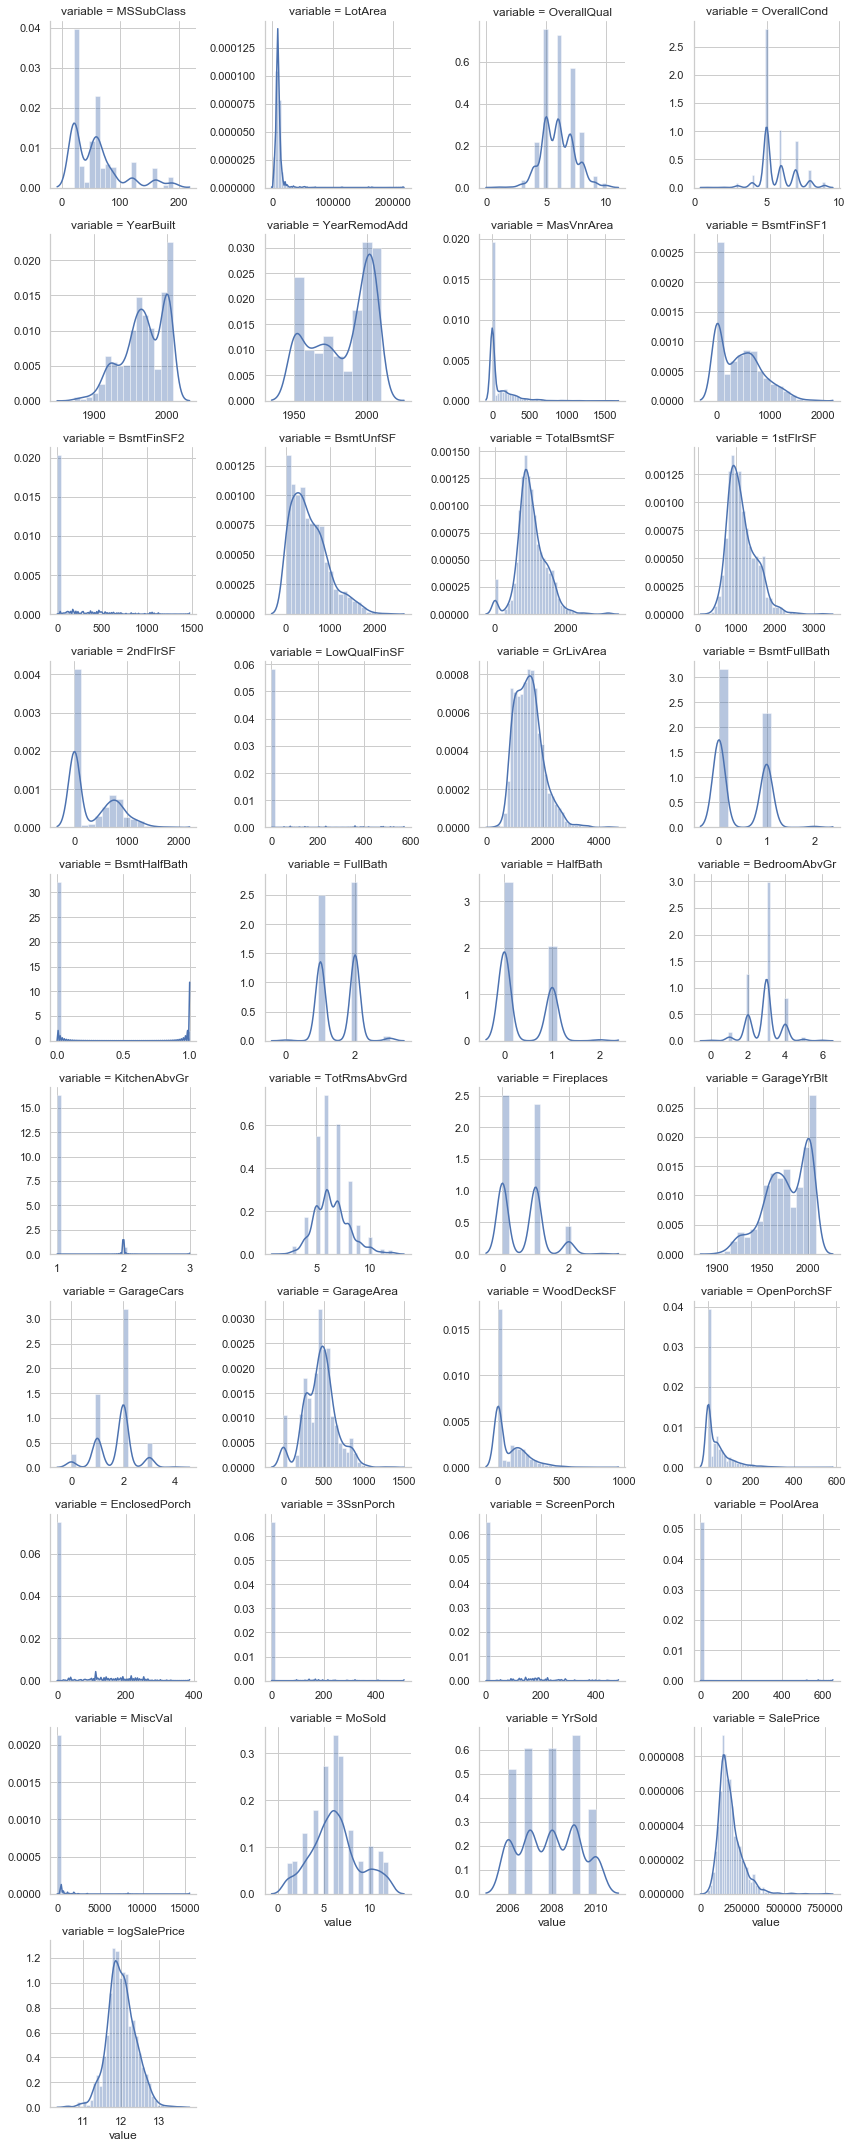

In [540]:
#create numeric plots
num = [f for f in housing.columns if housing.dtypes[f] != 'object']
num.remove('Id')
nd = pd.melt(housing, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

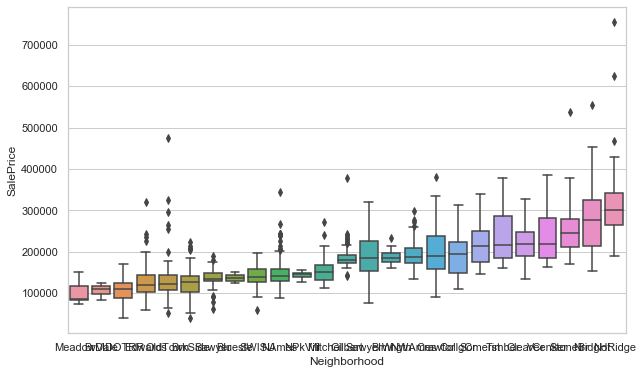

In [541]:
sorted_nb = housing.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
sns.boxplot(x=housing['Neighborhood'], y=housing['SalePrice'], order=list(sorted_nb.index))

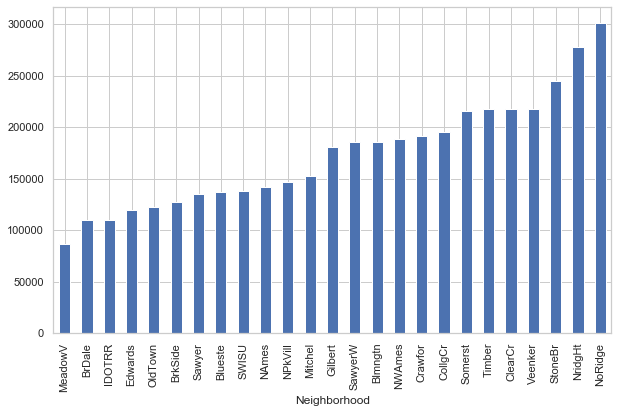

In [542]:
housing['SalePrice'].groupby(housing['Neighborhood']).median().sort_values().plot(kind='bar')

In [543]:
housing['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes',
       'BrkSide', 'Sawyer', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV',
       'NridgHt', 'Timber', 'Gilbert', 'OldTown', 'ClearCr', 'Crawfor',
       'Edwards', 'NPkVill', 'StoneBr', 'BrDale', 'Blmngtn', 'SWISU',
       'Blueste'], dtype=object)

In [544]:
#create dummy variables for neighbour based on median price ranges
def DUMneighbhorhood(x):
    
    if x == 'NoRidge' or x == 'NridgHt' or x == 'StoneBr':
        DUMneighbhorhood = 'High'
    elif x == 'Veenker' or x == 'ClearCr' or x == 'Timber' or x == 'Somerst' or x == 'CollgCr' or x == 'Crawfor' or x == 'NWAmes' or x == 'Blmngtn' or x == 'SawyerW' or x == 'Gilbert':
        DUMneighbhorhood = 'Med'
    else:
        DUMneighbhorhood = 'Low'

    return DUMneighbhorhood
  

In [545]:
housing['DUMneighbhorhood'] = housing['Neighborhood'].apply(DUMneighbhorhood)

C:\Users\bubuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [546]:
dummies = pd.get_dummies(housing['DUMneighbhorhood'],prefix = 'neighborhood')
housing = housing.join(dummies)

In [547]:
# set target variable for linear regression
y = housing['logSalePrice']

In [548]:
# set predictor variables
X = housing[['neighborhood_High','neighborhood_Med','neighborhood_Low','OverallQual', 'GrLivArea', 'GarageArea','FullBath','TotRmsAbvGrd','YearBuilt']]

In [549]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=22)

In [556]:
# Create a model for Linear Regression
linreg = LinearRegression()

# Fit the model with the Training data
linreg.fit(X_train,y_train)

# Calculate the score (R^2 for Regression) for Training Data
print('Rsquared for training data:', round(linreg.score(X_train, y_train),2))

# Calculate the score (R^2 for Regression) for Testing Data
print('Rsquared for testing data:', round(linreg.score(X_test, y_test),5))

Rsquared for training data: 0.84
Rsquared for testing data: 0.83932


In [551]:
intercept = linreg.intercept_
print('intercept: ', round(intercept,5))
coeff = pd.DataFrame(linreg.coef_, X.columns, columns=['Coefficient'])  
coeff

intercept:  6.52265


,Coefficient
neighborhood_High,0.060537
neighborhood_Med,0.013163
neighborhood_Low,-0.073699
OverallQual,0.092092
GrLivArea,0.000355
GarageArea,0.000293
FullBath,-0.057269
TotRmsAbvGrd,-0.009081
YearBuilt,0.002255


In [552]:
#make predictions on the test data
y_pred = linreg.predict(X_test)

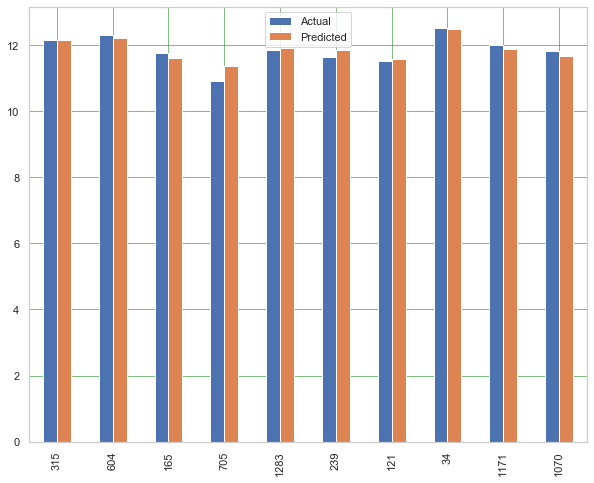

In [553]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [554]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11506390069089063
Mean Squared Error: 0.021805788786428613
Root Mean Squared Error: 0.14766783260557667
